## BUSINESS UNDERSTANDING

#### GOAL  
- To predict Sepsis illness (given patients' records) 

#### HYPOTHESES STATEMENTS  
- NULL ($H_0$) : There is no significant relationship between the features and the likelihood of having Sepsis.
- ALTERNATIVE ($H_1$) : There is a significant relationship between the features and the likelihood of having Sepsis.

#### ANALYTICAL QUESTIONS  

- What age is more prone to Sepsis?
- Does Sepsis vary with Insurance status?
- Which of the features are more associated with Sepsis cases?

### FEATURES  


| Column Name       | Description                                  |
|-------------------|---------------------------------------------------------------------------------|
| `ID `             | A patient's unique identifier                                                   |
| `PRG`             | Plasma glucose level                                                            |
| `PL`              | Platelet count                                                                  |
| `PR`              | Pulse rate                                                                      |
| `SK`              | Skin temperature                                                                |
| `TS`              | Total serum protein                                                             |
| `M11`             | Body mass index                                                                 |
| `BD2`             | Blood Work Result-4 (mu U/ml)                                                   |
| `Age`             | Patients age (years)                                                            |
|`Insurance`        | If a patient holds a valid insurance card                                       |
|`Sepssis`          | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise   |


In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

print('Libraries: Loaded!')

Libraries: Loaded!


In [2]:
# Loading the dataset
data = r"C:\Users\Etebom\Documents\Azubi_Project\datasets\Paitients_Files_Train.csv"

dn = pd.read_csv(data)
dn.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
dn.shape

(599, 11)

In [4]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


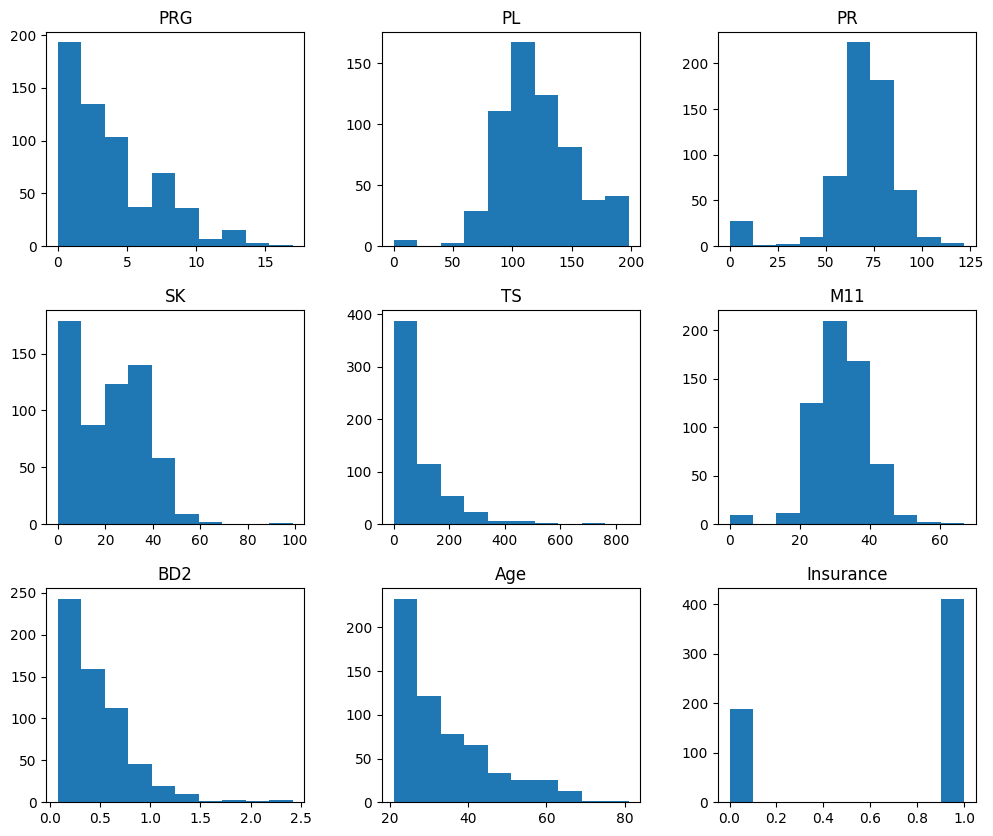

In [5]:
dn.hist(figsize=(12, 10), grid=False)
plt.show()

In [6]:
dn.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [7]:
colz = ['PRG', 'TS', 'BD2', 'Age']

In [8]:
# List of columns to apply the log transformation
columns_to_log = colz

# Apply log transformation (using log1p to handle zeros safely)
dn[columns_to_log] = dn[columns_to_log].apply(np.log1p)  # log1p(x) = log(1 + x)


In [9]:
dn[columns_to_log].head()

,PRG,TS,BD2,Age
0,1.945910,0.000000,0.486738,3.931826
1,0.693147,0.000000,0.300845,3.465736
2,2.197225,0.000000,0.514021,3.496508
3,0.693147,4.553877,0.154436,3.091042
4,0.000000,5.129899,1.190279,3.526361


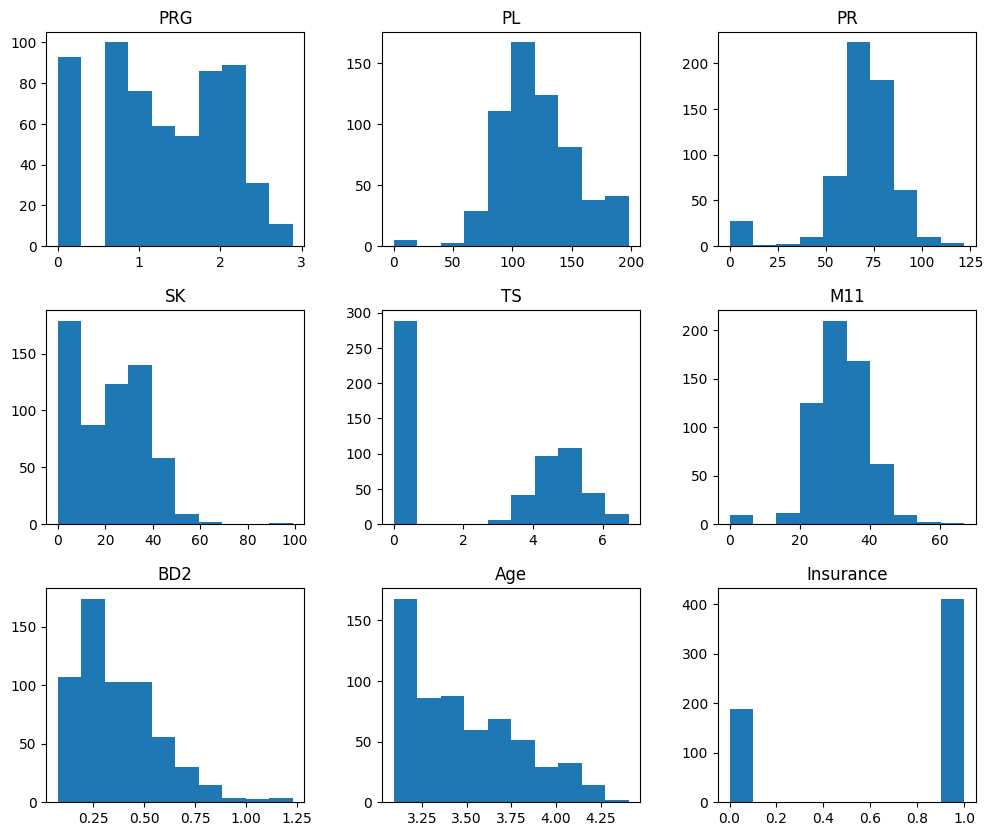

In [10]:
dn.hist(figsize=(12, 10), grid=False)
plt.show()

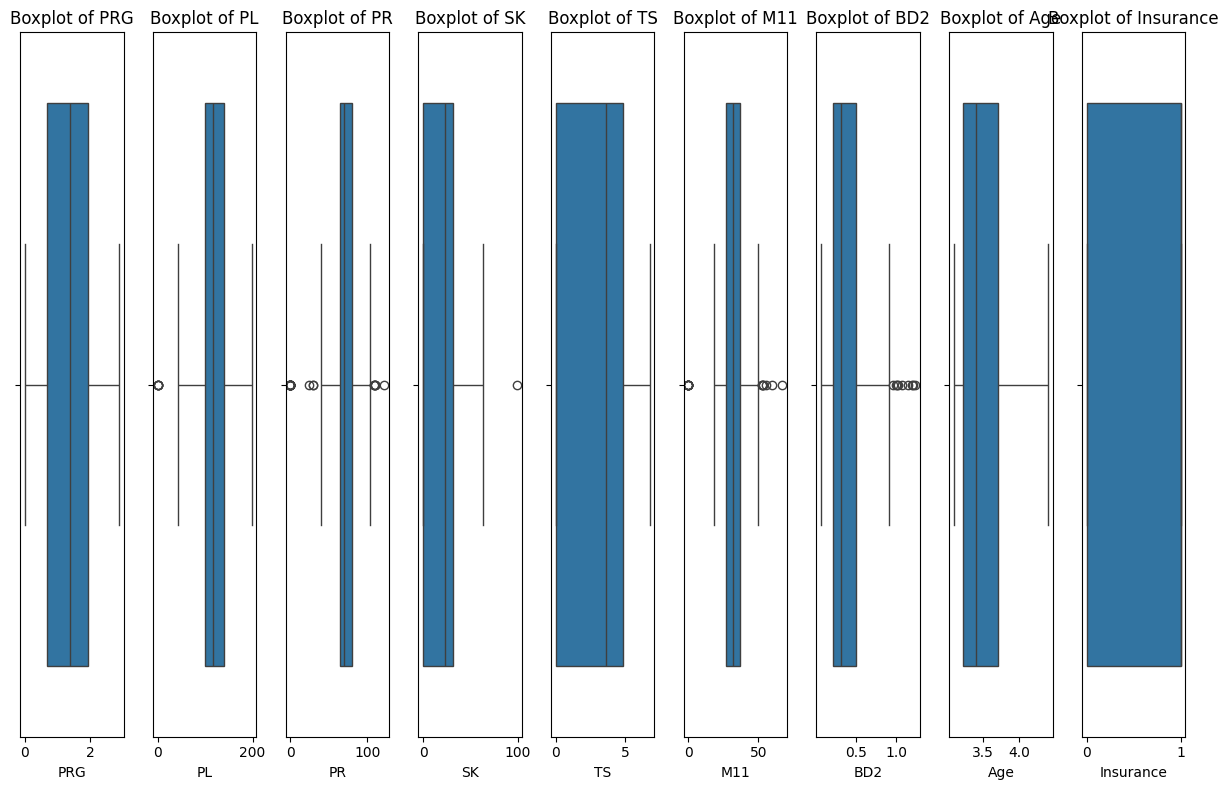

In [11]:
# Select only the continuous columns (numerical columns)
continuous_columns = dn.select_dtypes(include=['number']).columns

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create boxplots for each continuous column
for i, column in enumerate(continuous_columns):
    plt.subplot(1, len(continuous_columns), i + 1)
    sns.boxplot(x=dn[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Etebom\AppData\Local\Temp\ipykernel_16904\700717543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=dn_continuous, palette=palette)


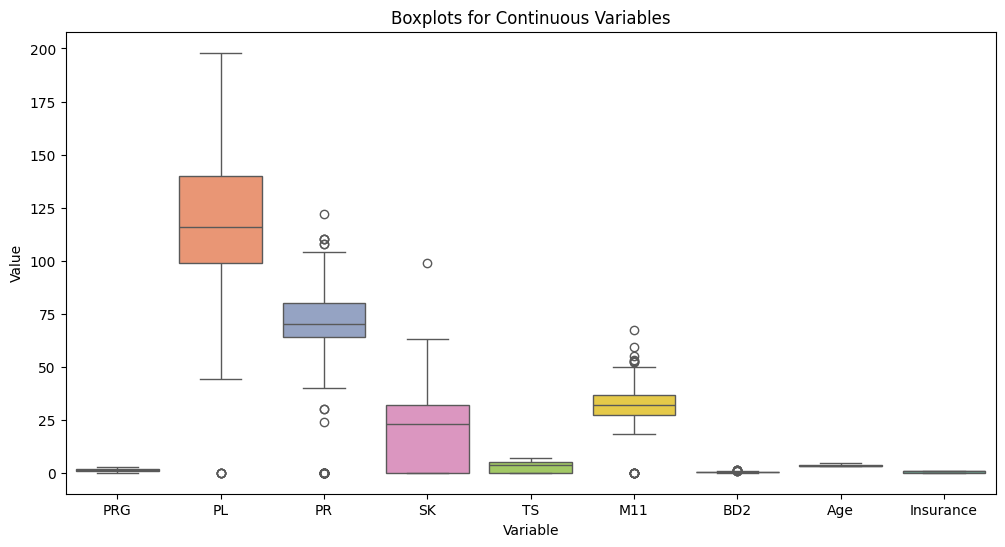

In [12]:
# Separate continuous and categorical columns
continuous_columns = dn.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dn.select_dtypes(include=['object']).columns

# Reshape the continuous data to long format for easy plotting
dn_continuous = pd.melt(dn[continuous_columns], var_name='Variable', value_name='Value')

# Set up the color palette for the boxplot
palette = sns.color_palette("Set2", len(continuous_columns))  # Customize palette if needed

# Create the boxplot for all continuous variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=dn_continuous, palette=palette)

# Add title and labels
plt.title('Boxplots for Continuous Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()


C:\Users\Etebom\AppData\Local\Temp\ipykernel_16904\917521834.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=dn_melted, palette=palette)


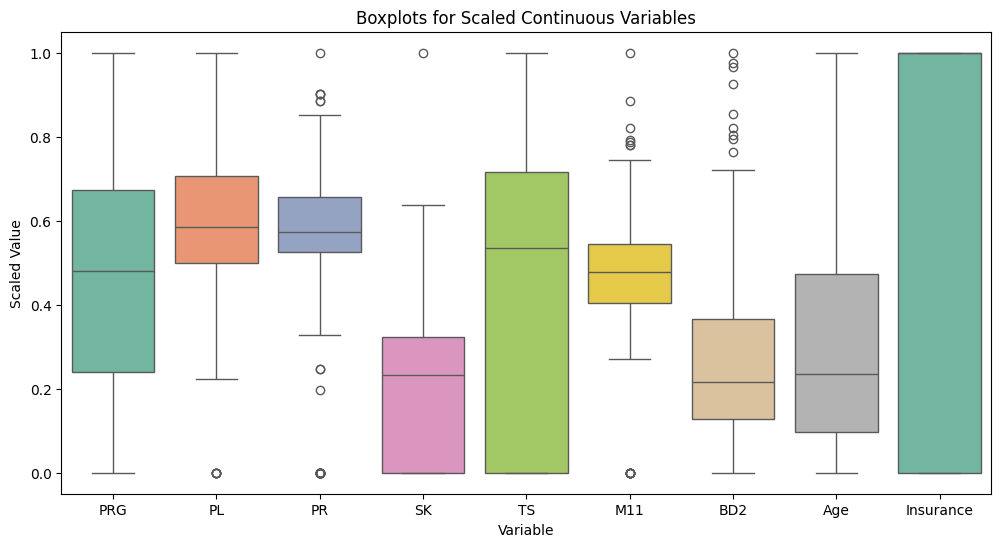

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'dn' and contains continuous variables
# Sample data for demonstration purposes (replace with your actual 'dn' DataFrame)
# data = {
#     'age': [23, 45, 56, 67, 34, 45, 39, 41, 36, 29],
#     'income': [40000, 50000, 60000, 70000, 55000, 65000, 48000, 59000, 71000, 62000],
#     'height': [5.4, 6.1, 5.9, 5.8, 5.5, 5.7, 5.6, 6.0, 5.8, 5.7],
# }
# dn = pd.DataFrame(data)

# Separate continuous variables (assumed to be numeric types)
continuous_columns = dn.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler to the continuous columns
scaler = MinMaxScaler()
dn_scaled = dn.copy()
dn_scaled[continuous_columns] = scaler.fit_transform(dn[continuous_columns])

# Reshape the scaled data for plotting
dn_melted = pd.melt(dn_scaled, value_vars=continuous_columns, var_name='Variable', value_name='Value')

# Set up the color palette for the boxplot
palette = sns.color_palette("Set2", len(continuous_columns))  # Customize palette if needed

# Create the boxplot for all continuous variables after scaling
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=dn_melted, palette=palette)

# Add title and labels
plt.title('Boxplots for Scaled Continuous Variables')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')

# Show the plot
plt.show()


In [14]:
# Step 1: Identify categorical and numerical columns
categorical_columns = dn.select_dtypes(include='object').columns

# Exclude 'customer_id' from the categorical columns list
categorical_columns = [col for col in categorical_columns if col != 'ID']

# Identify numerical columns
numerical_columns = dn.select_dtypes(exclude='object').columns

# Step 2: Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns),  # One-hot encode categorical columns
        ('num', 'passthrough', numerical_columns)  # Leave numeric columns as they are
    ]
)

# Step 3: Apply the transformations
dn_encoded = preprocessor.fit_transform(dn)

# Step 4: Debugging: Check the shape of transformed data
print(f"Shape of transformed data: {dn_encoded.shape}")
print(f"Number of encoded categorical columns: {len(categorical_columns)}")
print(f"Number of numerical columns: {len(numerical_columns)}")

# Get feature names for the encoded categorical columns
encoded_categorical_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)

# Check the number of encoded categorical columns
print(f"Number of columns after one-hot encoding: {len(encoded_categorical_columns)}")

# Step 5: Combine the feature names for categorical and numerical columns
final_columns = list(encoded_categorical_columns) + list(numerical_columns)

# Ensure the number of columns matches the transformed data
if len(final_columns) != dn_encoded.shape[1]:
    raise ValueError(f"Mismatch between number of columns in final_columns ({len(final_columns)}) "
                     f"and the transformed data ({dn_encoded.shape[1]})")

# Step 6: Create the final DataFrame with the new encoded columns
encoded_dn = pd.DataFrame(dn_encoded, columns=final_columns)

# Display the final DataFrame
encoded_dn.head()


Shape of transformed data: (599, 10)
Number of encoded categorical columns: 1
Number of numerical columns: 9
Number of columns after one-hot encoding: 1


,Sepssis_Positive,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1.0,1.945910,148.0,72.0,35.0,0.000000,33.6,0.486738,3.931826,0.0
1,0.0,0.693147,85.0,66.0,29.0,0.000000,26.6,0.300845,3.465736,0.0
2,1.0,2.197225,183.0,64.0,0.0,0.000000,23.3,0.514021,3.496508,1.0
3,0.0,0.693147,89.0,66.0,23.0,4.553877,28.1,0.154436,3.091042,1.0
4,1.0,0.000000,137.0,40.0,35.0,5.129899,43.1,1.190279,3.526361,1.0


In [25]:
encoded_dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepssis_Positive  599 non-null    float64
 1   PRG               599 non-null    float64
 2   PL                599 non-null    float64
 3   PR                599 non-null    float64
 4   SK                599 non-null    float64
 5   TS                599 non-null    float64
 6   M11               599 non-null    float64
 7   BD2               599 non-null    float64
 8   Age               599 non-null    float64
 9   Insurance         599 non-null    float64
dtypes: float64(10)
memory usage: 46.9 KB


C:\Users\Etebom\AppData\Local\Temp\ipykernel_16904\2082821889.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=dn_continuous, palette=palette)


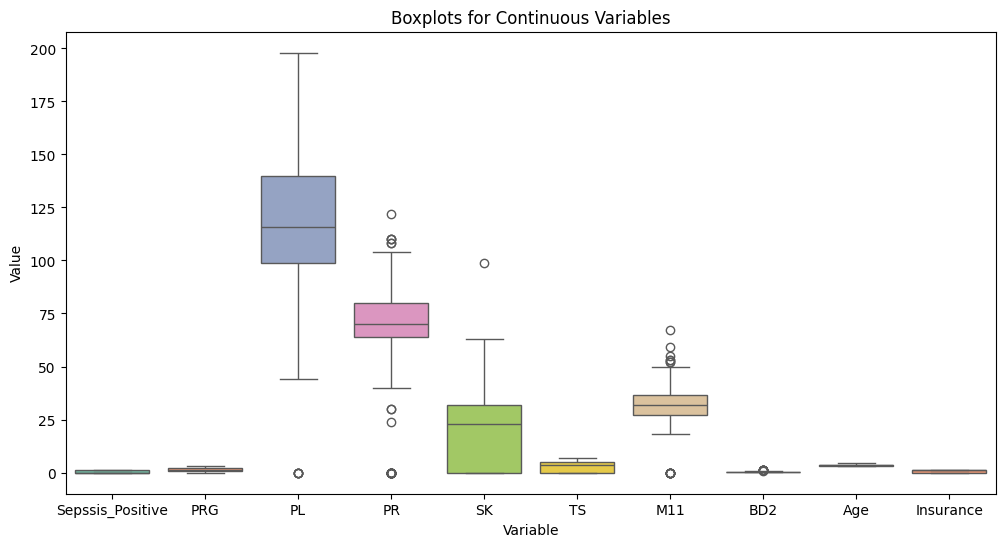

In [15]:
# Separate continuous and categorical columns
continuous_columns = encoded_dn.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = encoded_dn.select_dtypes(include=['object']).columns

# Reshape the continuous data to long format for easy plotting
dn_continuous = pd.melt(encoded_dn[continuous_columns], var_name='Variable', value_name='Value')

# Set up the color palette for the boxplot
palette = sns.color_palette("Set2", len(continuous_columns))  # Customize palette if needed

# Create the boxplot for all continuous variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Value', data=dn_continuous, palette=palette)

# Add title and labels
plt.title('Boxplots for Continuous Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()


In [16]:
X = encoded_dn.drop('Sepssis_Positive', axis=1)

y = encoded_dn['Sepssis_Positive']


# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Definition of SVM with class weights and hyperparameters
svm = SVC(max_iter=1000, class_weight='balanced')  # Added class_weight='balanced'

# Hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Training and hyperparameter tuning using GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, scoring='f1_macro')  # Scoring metric adjusted
grid_search_svm.fit(X_train, y_train)

# Best estimator
svm_best = grid_search_svm.best_estimator_

# Predictions
y_pred_svm = svm_best.predict(X_test)

# Evaluation
print("SVM Best Hyperparameters:", grid_search_svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
SVM Accuracy: 0.7666666666666667
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.79      0.81        77
         1.0       0.66      0.72      0.69        43

    accuracy                           0.77       120
   macro avg       0.75      0.76      0.75       120
weighted avg       0.77      0.77      0.77       120

SVM Confusion Matrix:
 [[61 16]
 [12 31]]


In [18]:
# Definition of Random Forest with class weights and hyperparameters
rf = RandomForestClassifier(class_weight='balanced')  # Added class_weight='balanced'

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Training and hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='f1_macro')  # Scoring metric adjusted
grid_search_rf.fit(X_train, y_train)

# Best estimator
rf_best = grid_search_rf.best_estimator_

# Predictions
y_pred_rf = rf_best.predict(X_test)

# Evaluation
print("Random Forest Best Hyperparameters:", grid_search_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.7166666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        77
         1.0       0.60      0.63      0.61        43

    accuracy                           0.72       120
   macro avg       0.69      0.70      0.69       120
weighted avg       0.72      0.72      0.72       120

Random Forest Confusion Matrix:
 [[59 18]
 [16 27]]


In [19]:
# Calculate class weights manually
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Ratio of majority to minority class

# Definition of XGBoost with class weights and hyperparameters
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)  # Added scale_pos_weight

# Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

# Training and hyperparameter tuning using GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='f1_macro')  # Scoring metric adjusted
grid_search_xgb.fit(X_train, y_train)

# Best estimator
xgb_best = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = xgb_best.predict(X_test)

# Evaluation
print("XGBoost Best Hyperparameters:", grid_search_xgb.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Accuracy: 0.7166666666666667
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.74      0.77        77
         1.0       0.59      0.67      0.63        43

    accuracy                           0.72       120
   macro avg       0.70      0.71      0.70       120
weighted avg       0.73      0.72      0.72       120

XGBoost Confusion Matrix:
 [[57 20]
 [14 29]]


In [20]:


# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # Resampling

# Definition of KNN with hyperparameters
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # 'distance' helps in handling imbalance
    'metric': ['euclidean', 'manhattan']
}

# Training and hyperparameter tuning using GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, scoring='f1_macro')  # Adjusted scoring
grid_search_knn.fit(X_train_resampled, y_train_resampled)  # Fit on resampled data

# Best estimator
knn_best = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = knn_best.predict(X_test)

# Evaluation
print("KNN Best Hyperparameters:", grid_search_knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.7083333333333334
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.78      0.77        77
         1.0       0.60      0.58      0.59        43

    accuracy                           0.71       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.71      0.71      0.71       120

KNN Confusion Matrix:
 [[60 17]
 [18 25]]


### SUMMARY OF RESULTS

In [21]:
# Store results from all models
results = {
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'KNN': accuracy_score(y_test, y_pred_knn)
}

# Print a summary table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nSummary of Model Performance:")
print(results_df)



Summary of Model Performance:
           Model  Accuracy
0            SVM  0.766667
1  Random Forest  0.716667
2        XGBoost  0.716667
3            KNN  0.708333


SAVING THE MODELS

In [22]:
joblib.dump(svm_best, 'Sepsis_svm_model2.pkl')
joblib.dump(rf_best, 'Sepsis_rf_model2.pkl')
joblib.dump(xgb_best, 'Sepsis_xgb_model2.pkl')
joblib.dump(knn_best, 'Sepsis_knn_model2.pkl')

['Sepsis_knn_model2.pkl']